**FLOWER IMAGE CLASSIFICATION**

**UNZIP FOLDER**

In [8]:
import zipfile
import os

# Define the path to the zip file and the destination folder
zip_file_path = '/content/archive(cv).zip'
destination_folder = 'FLOWER IMAGES'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Dataset extracted to {destination_folder}")

Dataset extracted to FLOWER IMAGES


**DETAILS OF DATASET**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set correct path to your train dataset
train_dir = '/content/FLOWER IMAGES/flower_images'  # This folder should contain class subfolders

# Optional: Check if path exists
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Directory not found: {train_dir}")

# Image preprocessing generator
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),     # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical',   # Use 'categorical' for multi-class classification
    shuffle=True
)

# Print details
print(f"Total training samples: {train_data.samples}")
print(f"Class labels: {train_data.class_indices}")
print(f"Batch size: {train_data.batch_size}")

# Load one batch to verify
sample_batch, sample_labels = next(train_data)
print(f"Sample images shape: {sample_batch.shape}")   # Expected: (32, 150, 150, 3)
print(f"Sample labels shape: {sample_labels.shape}")  # Expected: (32, num_classes)

Found 5000 images belonging to 5 classes.
Total training samples: 5000
Class labels: {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}
Batch size: 32
Sample images shape: (32, 150, 150, 3)
Sample labels shape: (32, 5)


**BASE FILE**

In [10]:
base_dir = "/content/FLOWER IMAGES/flower_images"
class_dirs = os.listdir(base_dir)
class_dirs

['Lilly', 'Tulip', 'Lotus', 'Sunflower', 'Orchid']

In [11]:
# number of images in each flower directory
for class_name in class_dirs:
    class_path = os.path.join(base_dir , class_name)
    num_images = len(os.listdir(class_path))
    print(f"{class_name} : {num_images} images")

Lilly : 1000 images
Tulip : 1000 images
Lotus : 1000 images
Sunflower : 1000 images
Orchid : 1000 images


**DISPLAY SOME IMAGES**

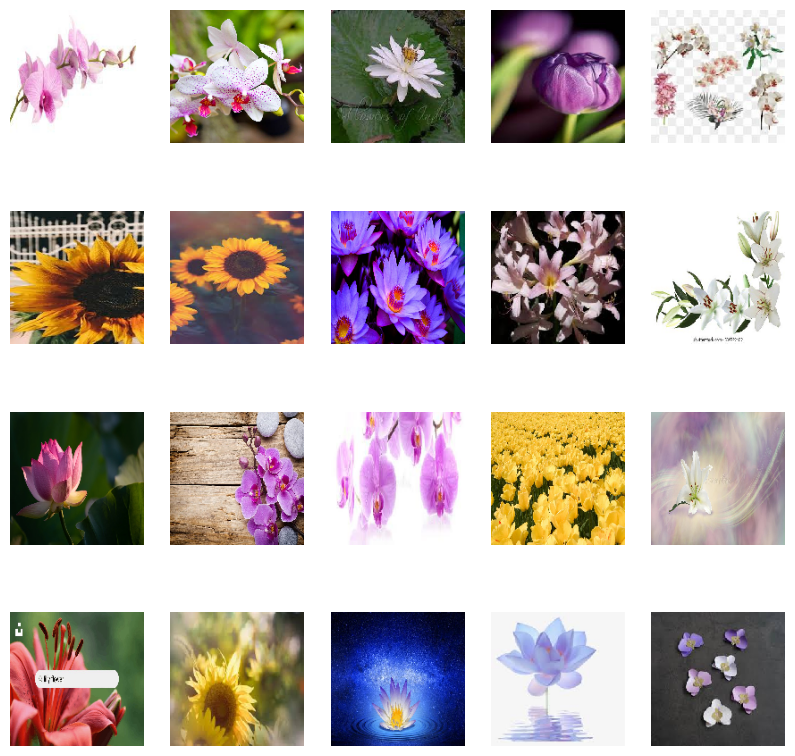

In [12]:
import matplotlib.pyplot as plt

def show_sample_images(dataset):
    # Show a few training images from the batch
    plt.figure(figsize=(10, 10))
    for i in range(20):  # Show 20 images
        plt.subplot(4, 5, i+1)
        plt.imshow(dataset[i])  # Display the image
        plt.axis('off')
    plt.show()

# Get a sample of training images
train_images, _ = next(train_data)
show_sample_images(train_images)

**Step 1: Import Required Libraries**

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras import regularizers

**Step 2: Define Constants and Initialize Lists for Data**

In [14]:
# Load Images into arrays as dataset
img_height = 180
img_width = 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,seed=123,validation_split=0.2,subset='training',batch_size = batch_size,image_size = (img_height,img_width),label_mode="int" )

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='validation',batch_size = batch_size,image_size = (img_height,img_width),label_mode="int" )

Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [15]:
# shape of datasets
for image , label in train_ds.take(1): # taking only 1 batch which is 32
    print("shape of image: ", image.shape)
    print("shape of label: ", label.shape)

shape of image:  (32, 180, 180, 3)
shape of label:  (32,)


In [16]:
flower_names = train_ds.class_names
flower_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

**Visualisation of Images**

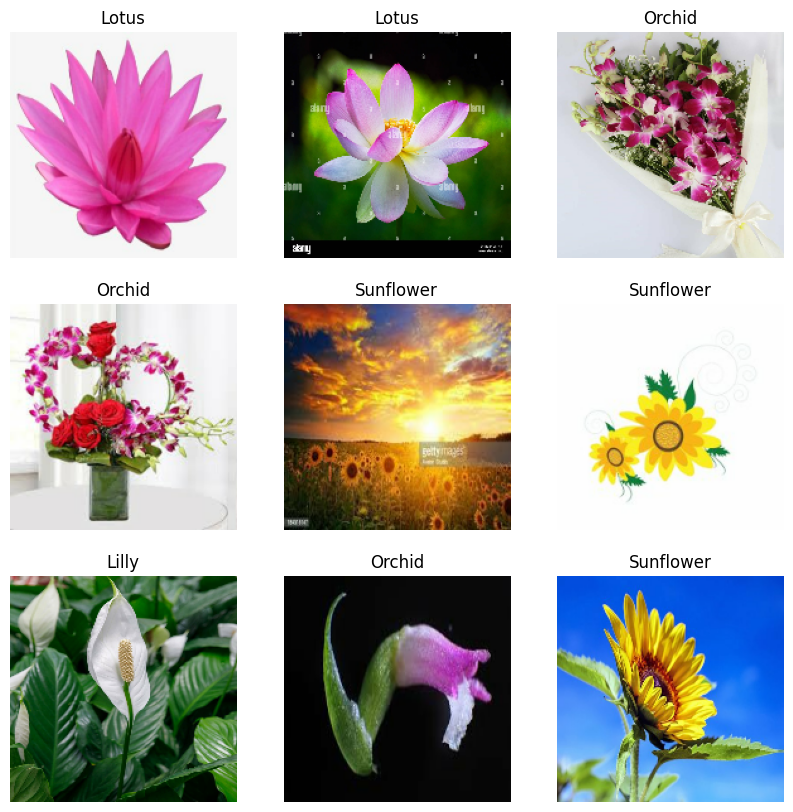

In [17]:
plt.figure(figsize=(10,10))
for images , labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Converts the image tensor to a NumPy array and casts it to uint8 (pixel format).
        plt.title(flower_names[labels[i]])
        plt.axis('off')

**Data Augmentation**

In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1)
])

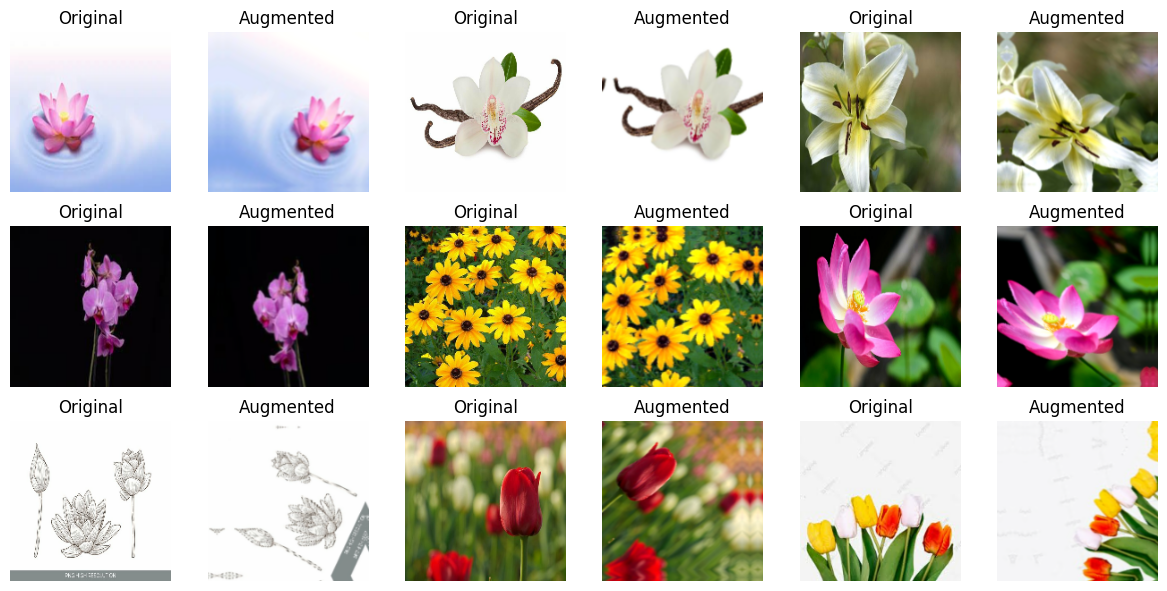

In [19]:
# real and augmented images
for images , label in train_ds.take(1):
    plt.figure(figsize=(12,6))
    for i in range(9):
        normal_images = images[i].numpy().astype('uint8')
        ax = plt.subplot(3, 6, 2*i + 1)
        plt.imshow(normal_images)
        plt.title('Original')
        plt.axis('off')


        augmented_images = data_augmentation(tf.expand_dims(images[i], 0))[0].numpy().astype('uint8')
        ax = plt.subplot(3, 6, 2*i + 2)
        plt.imshow(augmented_images)
        plt.title('Augmented')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    break

**Step 3: Function to Apply Filters to Images**

In [20]:
def apply_filters(image):
    # Original Image (No transformation)
    original = image

    # RGB Image (Ensure image is in RGB format)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Grayscale Image
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Watershed Transform (Segmenting using Watershed algorithm)
    gray_for_watershed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_for_watershed, 120, 255, cv2.THRESH_BINARY)
    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    _, watershed_result = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    watershed_result = watershed_result.astype(np.uint8)

    # Edge Detection (Canny Edge Detection)
    edges = cv2.Canny(image, 100, 200)

    return original, rgb_image, grayscale, watershed_result, edges

In [21]:
# labels names and its counts (Distribution)
from collections import Counter

label_list = []

for images, labels in train_ds:
    label_list.extend(labels.numpy())

# Count occurrences of each label
label_counts = Counter(label_list)

# Display the result
for label, count in label_counts.items():
    flower_name = flower_names[label]
    print(f" {label} {flower_name}: {count} samples")

 3 Sunflower: 791 samples
 1 Lotus: 803 samples
 4 Tulip: 785 samples
 2 Orchid: 800 samples
 0 Lilly: 821 samples


**Model Building**

In [22]:
custom_model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255), # normalize pixel values
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')

])
# model compile
custom_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# summary of the model
custom_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (1, 180, 180, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (1, 180, 180, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 180, 180, 16)      │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 90, 90, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 90, 90, 32)        │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 45, 45, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (1, 45, 45, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (1, 22, 22, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 22, 22, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 30976)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 128)               │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 5)                 │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

**ALEXNET MODEL**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

alexnet_model = Sequential()

# 1st Convolutional Layer
alexnet_model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3), padding='same'))
alexnet_model.add(BatchNormalization())
alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 2nd Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'))
alexnet_model.add(BatchNormalization())
alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 3rd Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
alexnet_model.add(BatchNormalization())

# 4th Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
alexnet_model.add(BatchNormalization())

# 5th Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
alexnet_model.add(BatchNormalization())
alexnet_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Flatten
alexnet_model.add(Flatten())

# 1st Fully Connected Layer
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))

# 2nd Fully Connected Layer
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))

# Output Layer
alexnet_model.add(Dense(5, activation='softmax'))  # 5 classes for flower dataset

# Compile the model
alexnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model architecture
alexnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,607,173 (82.42 MB)

 Trainable params: 21,604,421 (82.41 MB)

 Non-trainable params: 2,752 (10.75 KB)

**Model Training**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Model Fitting
history = custom_model.fit(train_ds, validation_data=val_ds, epochs=65, callbacks=[early_stop])

Epoch 1/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.4085 - loss: 1.4222 - val_accuracy: 0.5395 - val_loss: 1.1548
Epoch 2/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.5565 - loss: 1.1244 - val_accuracy: 0.5786 - val_loss: 1.0447
Epoch 3/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.5825 - loss: 1.0609 - val_accuracy: 0.5876 - val_loss: 1.0664
Epoch 4/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.5981 - loss: 1.0238 - val_accuracy: 0.6156 - val_loss: 0.9880
Epoch 5/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6179 - loss: 0.9754 - val_accuracy: 0.6517 - val_loss: 0.9364
Epoch 6/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.6329 - loss: 0.9490 - val_accuracy: 0.6627 - val_loss: 0.8952
Epoch 7/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.6528 - loss: 0.9145 - val_accuracy: 0.6657 - val_loss: 0.9084
Epoch 8/65
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.6497 - loss: 0.9207 - v

**Training Performance Visualization**

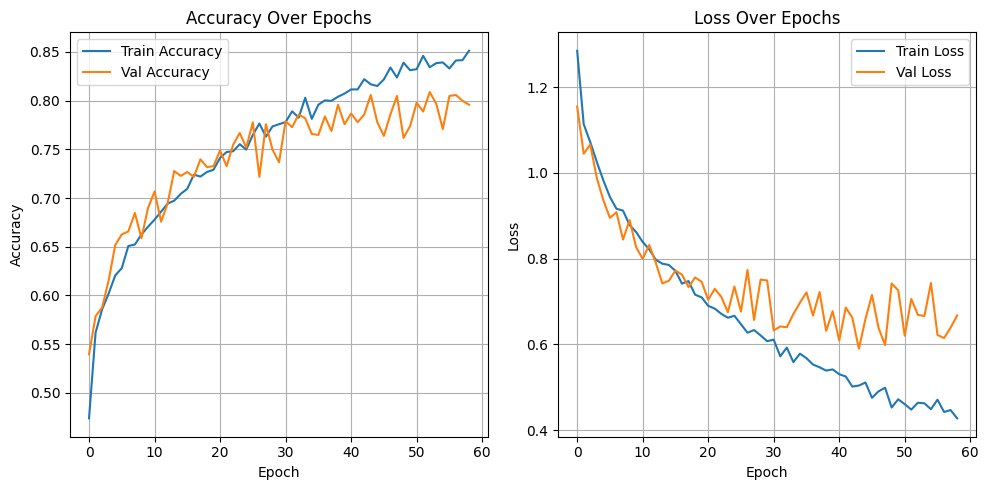

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Evaluation**

In [27]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = custom_model.evaluate(val_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8309 - loss: 0.5755
Validation Loss: 0.5897397398948669
Validation Accuracy: 0.8058058023452759


**Model Prediction**

In [28]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def predict_and_show(model,img_path,target_size=(180,180)):
    # preprocess
    image = load_img(img_path, target_size=(180, 180))
    img_array = np.expand_dims(image, axis=0)
    # predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = flower_names[predicted_class]
    confidence = prediction[0][predicted_class] * 100
    # show result
    print("Prediction vector:", prediction)
    print("Sum of probabilities:", np.sum(prediction))
    print("Predicted class index:", predicted_class)
    print(f"Prediction: {predicted_label} ({confidence:.2f}%)")
    # Show image with label
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Prediction vector: [[7.1037477e-01 5.9976440e-02 2.2765869e-01 1.4574826e-12 1.9901409e-03]]
Sum of probabilities: 1.0000001
Predicted class index: 0
Prediction: Lilly (71.04%)


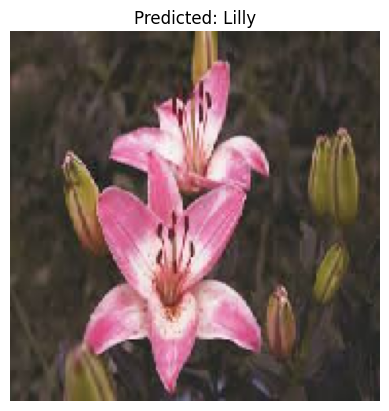

In [ ]:
img_path = "/content/FLOWER IMAGES/flower_images/Lilly/00048a5c76.jpg"
predict_and_show(model= custom_model,img_path = img_path)

**FUNCTION FOR PREDICTIONS**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


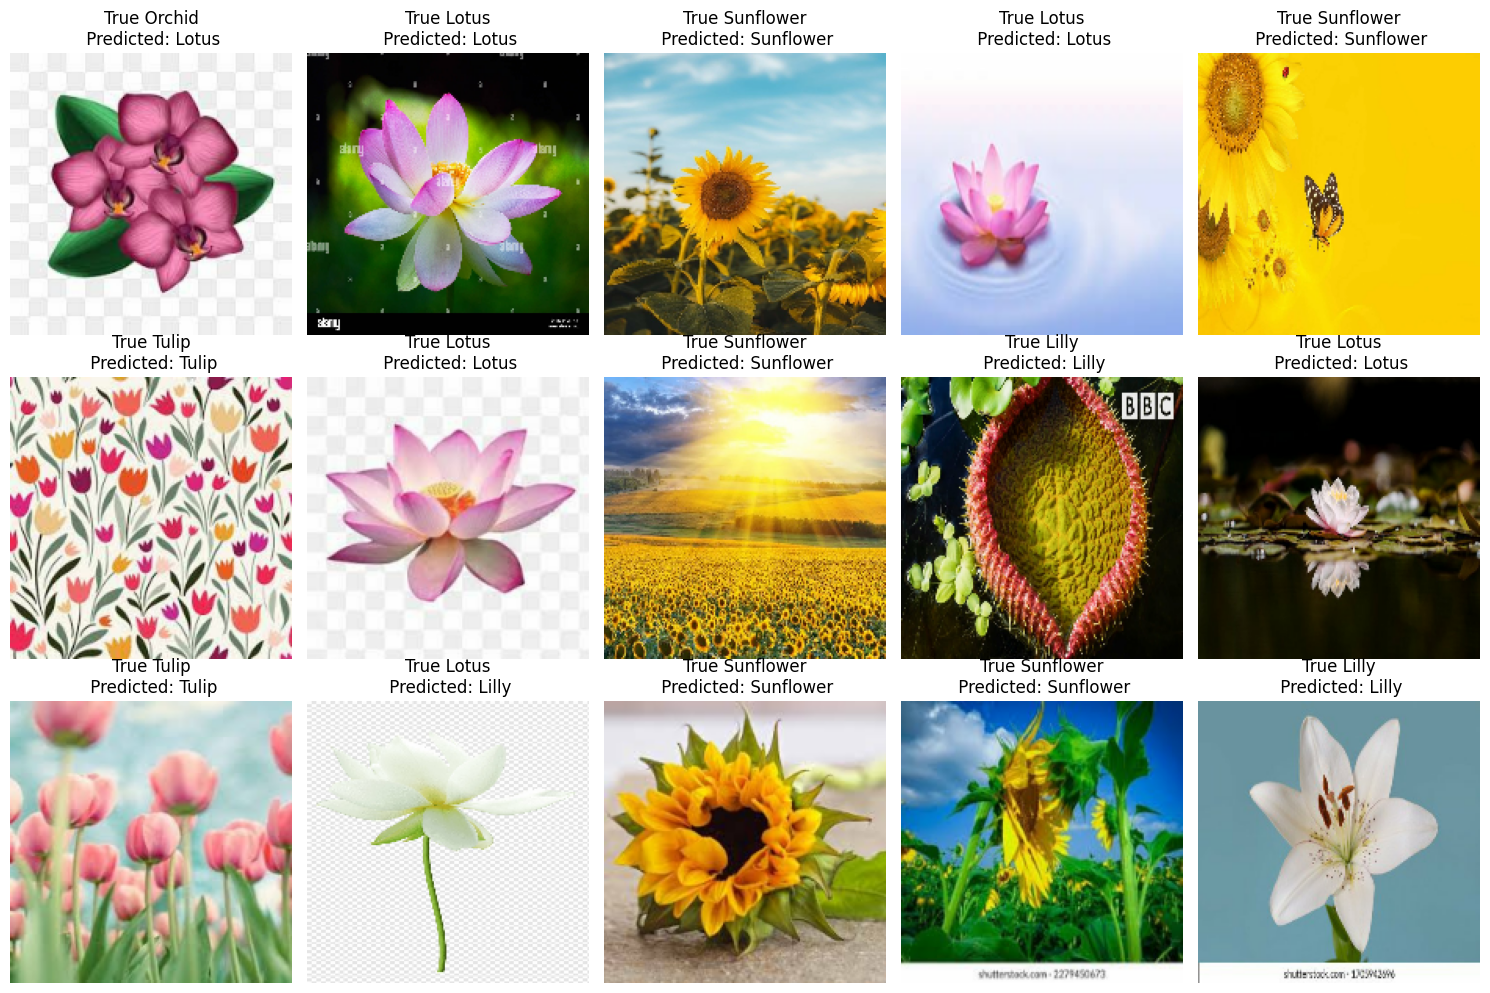

In [30]:
def show_predictions(model,dataset,num_images=15):
    plt.figure(figsize=(15,10))
    for images , label in dataset.take(1):
         prediction = model.predict(images)
         predicted_class = np.argmax(prediction,axis=1)
         for i in range(num_images):
             ax = plt.subplot(3,5,i+1)
             plt.imshow(images[i].numpy().astype('uint8'))
             true_label = flower_names[label[i]]
             predicted_label = flower_names[predicted_class[i]]
             plt.title(f"True {true_label}\n Predicted: {predicted_label}")
             plt.axis('off')


    plt.tight_layout()
    plt.show()

# Display 15 images
show_predictions(model=custom_model,dataset=train_ds,num_images=15)

**HISTOGRAM**

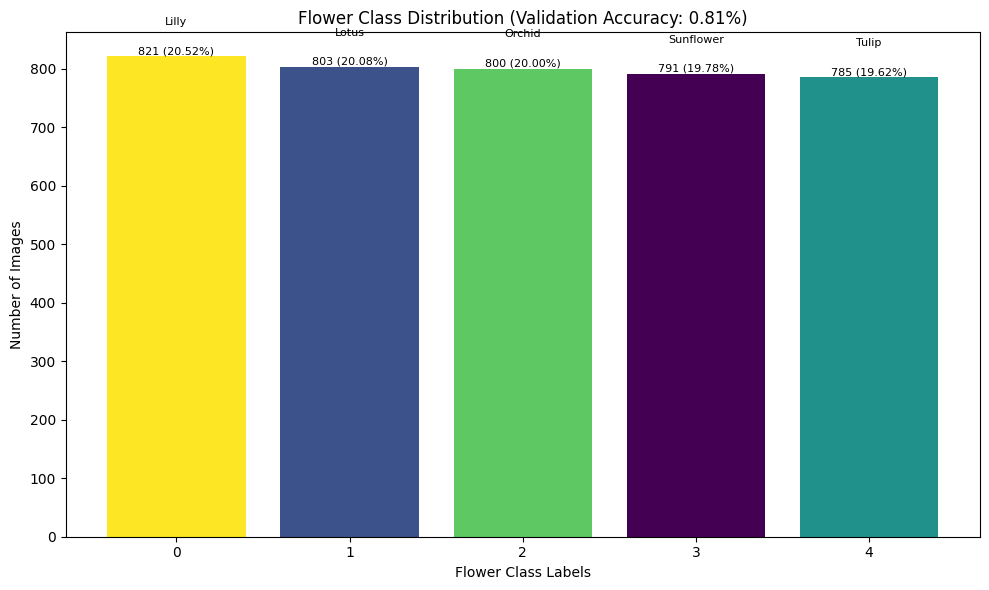

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_with_accuracy(label_counts, flower_names, validation_accuracy):
    """Plots a histogram of flower class distributions with accuracy percentages."""

    labels = list(label_counts.keys())
    counts = list(label_counts.values())
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))  # Use a colormap for distinct colors

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color=colors)

    # Add accuracy percentage on top of each bar
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height} ({(height / sum(counts) * 100):.2f}%)', ha='center', va='bottom', fontsize=8)
        flower_name = flower_names[label] # Access the flower name
        plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{flower_name}", ha='center', va='bottom', fontsize=8)

    plt.xlabel("Flower Class Labels")
    plt.ylabel("Number of Images")
    plt.title(f"Flower Class Distribution (Validation Accuracy: {validation_accuracy:.2f}%)")
    plt.xticks(labels, labels)  # Show numerical labels
    plt.tight_layout()
    plt.show()

plot_histogram_with_accuracy(label_counts, flower_names, validation_accuracy)

**CONFUSION MATRIX**

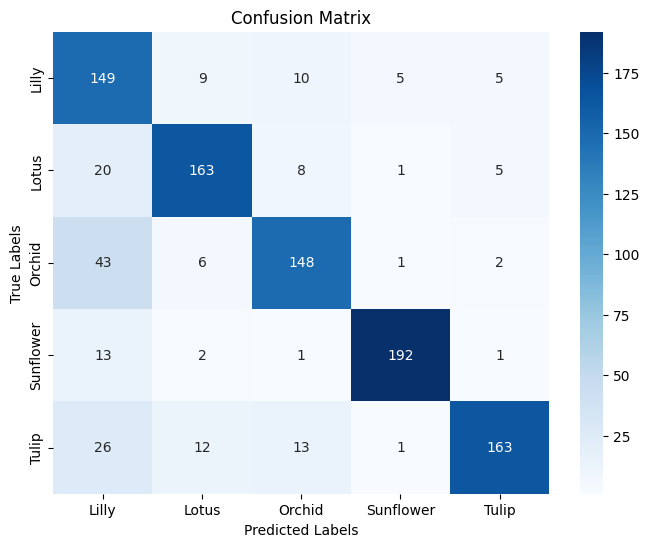

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(val_labels, pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=flower_names, yticklabels=flower_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**ROC CURVE**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

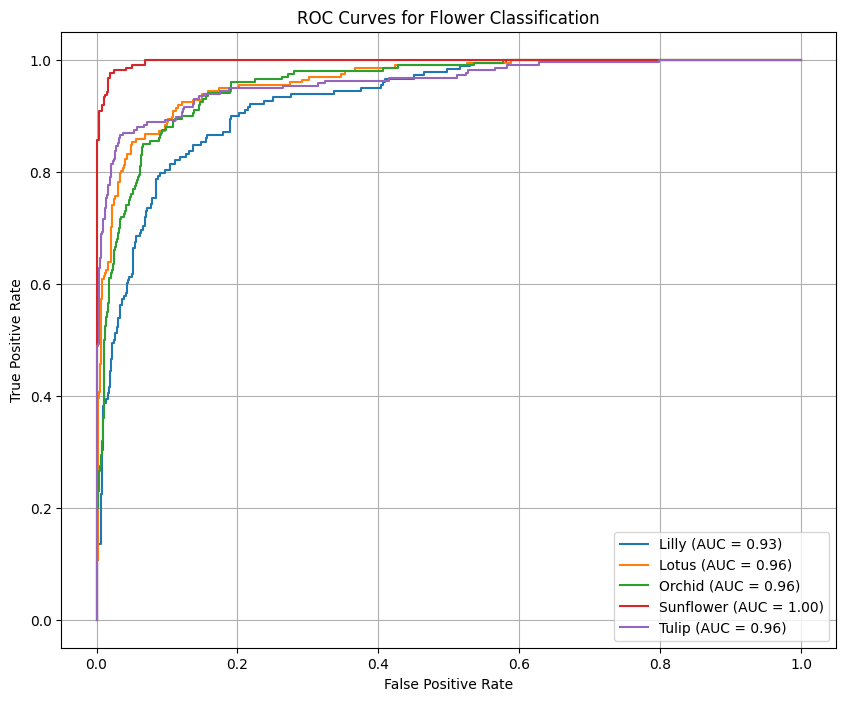

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_true = []
y_pred_prob = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    y_pred_prob.extend(custom_model.predict(images))

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)

# Binarize the output
n_classes = 5
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

class_names = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip'] # Replace with your actual class names
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

#plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Flower Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**CLASSIFICATION REPORT**

In [ ]:
# Classification report
from sklearn.metrics import classification_report
import numpy as np

val_labels = []  # List to store true labels
pred_labels = [] # List to store predicted labels

for images, labels in val_ds:
    val_labels.extend(labels.numpy())
    pred_labels.extend(np.argmax(custom_model.predict(images), axis=1))

# Convert lists to NumPy arrays for compatibility with classification_report
val_labels = np.array(val_labels)
pred_labels = np.array(pred_labels)

print(classification_report(val_labels, pred_labels, target_names=flower_names)) # Use flower_names instead of generic class names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

**TEST ACCURACY**

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = custom_model.evaluate(val_ds)  # Use val_ds for evaluation

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8317 - loss: 0.5498
Test Accuracy: 81.58%


**DISPLAY IMAGE INTO RGB, GRAYSCALE, WATERSHED TRANSFORM, EDGE DETECTION**

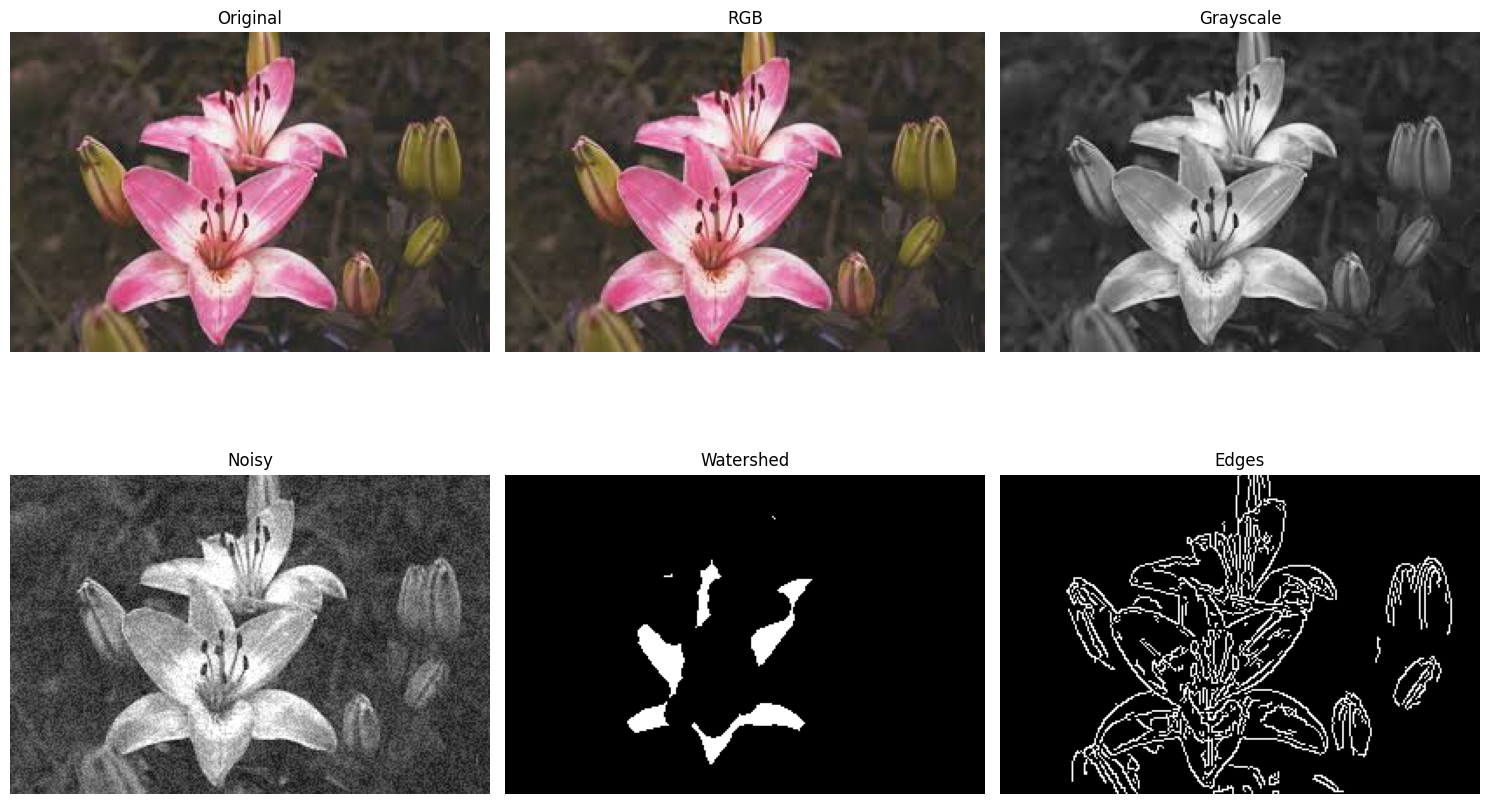

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "/content/FLOWER IMAGES/flower_images/Lilly/00048a5c76.jpg"
apply_filters(image_path)

def apply_filters(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return

    # Original Image (No transformation)
    original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # RGB Image (Ensure image is in RGB format)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Grayscale Image
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noisy Image
    noise = np.random.randint(0, 50, grayscale.shape, dtype='uint8') # Use grayscale.shape instead of gray.shape
    noisy_image = cv2.add(grayscale, noise) # Use grayscale instead of gray

    # Watershed Transform (Segmenting using Watershed algorithm)
    gray_for_watershed = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_for_watershed, 120, 255, cv2.THRESH_BINARY)
    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    _, watershed_result = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    watershed_result = watershed_result.astype(np.uint8)

    # Edge Detection (Canny Edge Detection)
    edges = cv2.Canny(image, 100, 200)

    # Display the images
    images = [original, rgb_image, grayscale, noisy_image, watershed_result, edges] # Use noisy_image
    titles = ['Original', 'RGB', 'Grayscale', 'Noisy', 'Watershed', 'Edges']

    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None) # Use grayscale cmap if 2D
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()